In [1]:
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
utils_dir = os.path.join(parent_dir, "src", "utils")
sys.path.append(utils_dir)
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from process_data import process_data
from weighted_accuracy import weighted_accuracy_scorer
from plot_learning_curves import plot_learning_curves

NameError: name 'X_train' is not defined

In [ ]:
X_path= os.path.join("..", "data","input", "X_train_Wwou3IE.csv")
X_preprocessed = pd.read_csv(X_path, delimiter=',')
y_path= os.path.join("..", "data","input", "y_train_jJtXgMX.csv")
y_preprocessed = pd.read_csv(y_path, delimiter=',')

In [ ]:
cold_rate = {
    1: 100,  # January
    2: 90,   # February
    3: 70,   # March
    4: 50,   # April
    5: 30,   # May
    6: 10,   # June
    7: 0,    # July
    8: 5,    # August
    9: 20,   # September
    10: 40,  # October
    11: 60,  # November
    12: 80   # December
}

X_preprocessed['DELIVERY_START'] = pd.to_datetime(X_preprocessed['DELIVERY_START'], utc = True)

X_preprocessed['month'] = X_preprocessed['DELIVERY_START'].dt.month
X_preprocessed['cold_rate'] = X_preprocessed['month'].map(cold_rate)
X_preprocessed.drop('month', axis=1, inplace=True)

In [ ]:
X = process_data(X_preprocessed.copy(deep=True), "predicted_spot_price", None, "standard")
y = process_data(y_preprocessed.copy(deep=True), None, None, None)
y['spot_id_delta'] = y['spot_id_delta'].apply(lambda x: -1 if x < 0 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y, y['spot_id_delta'].unique()

(                           spot_id_delta
 DELIVERY_START                          
 2022-01-01 01:00:00+00:00             -1
 2022-01-01 02:00:00+00:00             -1
 2022-01-01 03:00:00+00:00             -1
 2022-01-01 04:00:00+00:00              1
 2022-01-01 05:00:00+00:00              1
 ...                                  ...
 2023-03-29 17:00:00+00:00              1
 2023-03-29 18:00:00+00:00              1
 2023-03-29 19:00:00+00:00              1
 2023-03-29 20:00:00+00:00              1
 2023-03-29 21:00:00+00:00              1
 
 [10605 rows x 1 columns],
 array([-1,  1], dtype=int64))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize the KNN model
# You can adjust 'n_neighbors' based on your validation tests to find the best value
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on your training data
knn.fit(X_train, y_train)

# Predict on your test data
predictions = knn.predict(X_test)




c:\Users\emac\Documents\MachineLearningAvance\elmy\elmy\elmy_env\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:
 [[687 354]
 [341 739]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.66      0.66      1041
           1       0.68      0.68      0.68      1080

    accuracy                           0.67      2121
   macro avg       0.67      0.67      0.67      2121
weighted avg       0.67      0.67      0.67      2121

Accuracy: 0.6723243752946724
ROC AUC: 0.6721008111858257


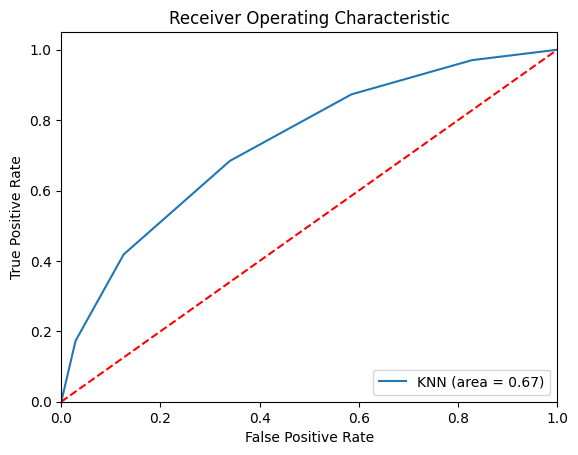

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
# ROC and AUC, ensure your classes are encoded as 0 and 1 for these calculations
# y_test_encoded and predictions_encoded need to be adjusted if your y_test and predictions are not in this format
roc_auc = roc_auc_score(y_test, predictions)
print("ROC AUC:", roc_auc)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy of 0.67

In [ ]:
"""from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Initializing and training the SVM model
svm_model = SVC(kernel='linear', C=1.0)  # You can change the kernel and C value based on your requirement
svm_model.fit(X_train, y_train.values.ravel())  # .values.ravel() to convert y_train to a 1D array if it's not already

# Predicting the Test set results
y_pred = svm_model.predict(X_test)

# Making the Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")"""


'from sklearn.svm import SVC\nfrom sklearn.metrics import classification_report, accuracy_score\nfrom sklearn.model_selection import train_test_split\nimport pandas as pd\n\n# Initializing and training the SVM model\nsvm_model = SVC(kernel=\'linear\', C=1.0)  # You can change the kernel and C value based on your requirement\nsvm_model.fit(X_train, y_train.values.ravel())  # .values.ravel() to convert y_train to a 1D array if it\'s not already\n\n# Predicting the Test set results\ny_pred = svm_model.predict(X_test)\n\n# Making the Confusion Matrix and classification report\nfrom sklearn.metrics import confusion_matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Classification report\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))\n\n# Calculating the accuracy of the model\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy:.2f}")'

Score of 0.52

In [ ]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Initializing and training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
log_reg.fit(X_train, y_train.values.ravel())  # .values.ravel() to convert y_train to a 1D array if it's not already

# Predicting the Test set results
y_pred = log_reg.predict(X_test)

# Making the Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")"""

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, accuracy_score\nfrom sklearn.model_selection import train_test_split\nimport pandas as pd\n\n# Initializing and training the Logistic Regression model\nlog_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur\nlog_reg.fit(X_train, y_train.values.ravel())  # .values.ravel() to convert y_train to a 1D array if it\'s not already\n\n# Predicting the Test set results\ny_pred = log_reg.predict(X_test)\n\n# Making the Confusion Matrix and classification report\nfrom sklearn.metrics import confusion_matrix\ncm = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(cm)\n\n# Classification report\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))\n\n# Calculating the accuracy of the model\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy:.2f}")'

Score of 0.52

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X, y are already defined and preprocessed as per your earlier message
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initializing and training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train.values.ravel())  # .values.ravel() to convert y_train to a 1D array if it's not already

# Predicting the Test set results
y_pred = decision_tree.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[712 329]
 [346 734]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.68      0.68      1041
           1       0.69      0.68      0.69      1080

    accuracy                           0.68      2121
   macro avg       0.68      0.68      0.68      2121
weighted avg       0.68      0.68      0.68      2121

Accuracy: 0.68
